# STEP 4 & 5

In [1]:
# !pip install eia
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from hmmlearn import hmm

In [2]:
EIA_TOKEN="SkISq5ivyi0kHjp7gjiS5eAH4EZ3RAGOuCeCIcha"
import os
os.environ["EIA_TOKEN"]=EIA_TOKEN

In [3]:
# !pip install myeia

Similar to Project-II, let's collect the data and clean it.

In [4]:
import pandas as pd
import numpy as np
# import eia
from myeia.api import API

EIA_API_KEY = "SkISq5ivyi0kHjp7gjiS5eAH4EZ3RAGOuCeCIcha"

# Set the start and end dates for the data retrieval

from myeia.api import API
eia_ = API()

monthly_data = eia_.get_series(series_id="TOTAL.COEXPUS.M")

# Convert the retrieved data into a pandas DataFrame for easy manipulation and analysis
eia_data = pd.DataFrame(monthly_data)

# Display the first few rows of the DataFrame to preview the data
print(eia_data.head())

           TOTAL.COEXPUS.M
Date                      
2023-09-01          4200.3
2023-08-01        4364.484
2023-07-01        3834.655
2023-06-01        3820.605
2023-05-01        3789.268


In [5]:
import datetime

def convert_to_datetime(input):
    date_str = input.strftime("%Y-%m-%d")
    return datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

# Apply the conversion function to the entire index
eia_data.index = eia_data.index.map(convert_to_datetime)

# Convert the index to datetime64[ns] format for temporal analysis
eia_data.index = pd.to_datetime(eia_data.index)

# Update the column names to match the variable names
eia_data.columns = ['TOTAL.COEXPUS.M']

eia_data.head()

,TOTAL.COEXPUS.M
Date,
2023-09-01,4200.3
2023-08-01,4364.484
2023-07-01,3834.655
2023-06-01,3820.605
2023-05-01,3789.268


In [6]:
# Replace the '-' with np.nan
eia_data.replace('-', np.nan, regex=True, inplace=True);
# Backward fill the holes, by filling them with the data infront.
eia_data.fillna(method='bfill', inplace=True);

In [7]:
def clean_EIA(data):
    data.replace('-', np.nan, regex=True, inplace=True);
    data.fillna(method='bfill', inplace=True);
    data.index = data.index.map(convert_to_datetime);
    data.index = pd.to_datetime(data.index);

In [8]:
# def retrieve_data():
#     # Create EIA API using your specific API key
#     api_key = "SkISq5ivyi0kHjp7gjiS5eAH4EZ3RAGOuCeCIcha"
#     # api = eia.API(api_key)

#     # Retrieve Data By Series ID
#     series_ID='STEO.RGDPQ_NONOECD.M'
#     series_search =eia_.get_series(series_id=series_ID)
#     # df = pd.DataFrame(series_search)
#     # df.index.names = ['Date']
#     # df.columns=[ "Price"]
#     # df.index = df.index.str.replace('^([\d]{4})\s([\d]{2})([\d]{2})\s[\d]{2}', r'\1-\2-\3',regex=True)
#     # df.index = pd.to_datetime(df.index)
#     return series_search

# data = retrieve_data()
# data.head()
# #data.to_csv('OK_WTI_Spot_Price_FOB.csv',index=True)

In [9]:
# !pip install fredapi

In [10]:
from fredapi import Fred
# FRED API key
fred_key = "f33017f0f73843287480933867eb6436";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);
# Retrieve data from FRED API
fred_data = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC']);

In [11]:
fred_data.head()

,WTISPLC
1946-01-01,1.17
1946-02-01,1.17
1946-03-01,1.17
1946-04-01,1.27
1946-05-01,1.27


In [12]:
# Dataset series ID from the EIA
datasets_eia = [
    #"STEO.RGDPQ_NONOECD.M",
    #"STEO.RGDPQ_OECD.M",
    "STEO.PAPR_NONOPEC.M",
    "STEO.PAPR_OPEC.M",
    "STEO.PATC_OECD.M",
    "STEO.PATC_NON_OECD.M",
    "STEO.COPRPUS.M",
    "STEO.CORIPUS.M",
    "PET.MCRIMXX2.M",
    #"STEO.FOREX_WORLD.M",
    #"STEO.PASC_OECD_T3.M",
    "STEO.COPS_OPEC.M",
    "STEO.COPC_OPEC.M",
    "STEO.T3_STCHANGE_OOECD.M",
    "STEO.T3_STCHANGE_NOECD.M",
];
# Dataset series ID from the FRED
datasets_fred = [
    'CPIENGSL',
    'CAPG211S',
    'CAPUTLG211S',
    'IPG211S',
    'IPG211111CN',
    'INDPRO',
    'IPN213111N',
    'PCU211211',
];

In [13]:
data_merge = []; # List of dataframes to be concatenated

# Adding EIA datasets
for series_id_ in datasets_eia:
  df = pd.DataFrame(eia_.get_series(series_id=series_id_))
  clean_EIA(df)
  df.columns = [series_id_]
  data_merge.append(df)

# Adding FRED datasets
for series_id in datasets_fred:
    df = pd.DataFrame(fred.get_series(series_id), columns=[series_id])
    data_merge.append(df)



In [14]:
datasets = datasets_eia + datasets_fred + ['WTISPLC', 'forecast'];

current =  pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC']);
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1),
                        columns=['forecast']);

data_merge.append(current);
data_merge.append(forecast);

In [15]:
data_merge

[            STEO.PAPR_NONOPEC.M
 Date                           
 2024-12-01            69.971965
 2024-11-01            70.068037
 2024-10-01            69.743810
 2024-09-01            69.349308
 2024-08-01            69.685732
 ...                         ...
 1993-05-01            41.418634
 1993-04-01            41.482130
 1993-03-01            41.703569
 1993-02-01            41.755341
 1993-01-01            41.897640
 
 [384 rows x 1 columns],
             STEO.PAPR_OPEC.M
 Date                        
 2024-12-01         33.134098
 2024-11-01         33.159162
 2024-10-01         33.286775
 2024-09-01         33.407123
 2024-08-01         33.403738
 ...                      ...
 1993-05-01         25.108566
 1993-04-01         24.934845
 1993-03-01         25.448079
 1993-02-01         26.052563
 1993-01-01         25.891535
 
 [384 rows x 1 columns],
             STEO.PATC_OECD.M
 Date                        
 2024-12-01         46.517488
 2024-11-01         45.978357
 2024-1

In [16]:
data = pd.concat(data_merge, axis=1, join='inner');
data

,STEO.PAPR_NONOPEC.M,STEO.PAPR_OPEC.M,STEO.PATC_OECD.M,STEO.PATC_NON_OECD.M,STEO.COPRPUS.M,STEO.CORIPUS.M,PET.MCRIMXX2.M,STEO.COPS_OPEC.M,STEO.COPC_OPEC.M,STEO.T3_STCHANGE_OOECD.M,...,CPIENGSL,CAPG211S,CAPUTLG211S,IPG211S,IPG211111CN,INDPRO,IPN213111N,PCU211211,WTISPLC,forecast
2021-04-01,63.639851,30.361959,43.318906,52.166955,11.317989,15.162167,848,6.535000,31.530000,-0.272100,...,228.338,130.7368,94.3495,123.3496,165.4243,98.2886,85.2761,153.0,61.72,65.17
2021-03-01,63.546533,30.281925,43.697854,51.815354,11.351135,14.387129,704,6.525000,31.550000,1.950097,...,227.958,131.0194,93.2076,122.1201,165.8403,98.1351,81.4481,164.0,62.33,61.72
2021-02-01,60.395080,30.115158,41.908931,51.996820,9.915936,12.370929,634,6.585000,31.460000,1.249464,...,220.267,131.3435,82.0497,107.7669,150.8145,95.3744,80.6887,189.1,59.04,62.33
2021-01-01,63.280307,30.599510,41.788083,50.714775,11.137354,14.541839,510,5.685000,30.990000,-0.509581,...,211.921,131.7005,92.3355,121.6064,169.2416,98.7836,75.6587,140.8,52.00,59.04
2020-12-01,62.648828,30.431687,43.114330,50.983447,11.171507,14.139806,336,6.025000,31.280000,0.889581,...,206.140,132.0836,90.9267,120.0992,169.6635,97.9754,68.7785,129.3,47.02,52.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-06-01,48.895490,28.993814,48.119533,30.827331,5.659077,15.620000,4722,2.138374,28.097749,-0.737567,...,129.800,64.6074,91.0202,58.8058,86.9731,90.5218,103.1716,169.3,30.72,30.76
2003-05-01,48.957679,29.640108,47.515790,30.425602,5.663475,15.910000,5060,1.185702,27.859523,-0.476290,...,129.400,64.5345,90.8138,58.6062,87.0407,90.4073,101.5677,152.7,28.14,30.72
2003-04-01,49.153074,29.492674,48.385719,29.941029,5.725816,15.575000,5279,0.820811,27.293232,-0.284933,...,136.500,64.4629,92.4046,59.5667,87.9987,90.4281,96.1021,150.2,28.25,28.14
2003-03-01,49.557978,30.225636,49.263850,30.374890,5.803461,14.933000,4883,0.957693,28.249329,-1.772806,...,143.900,64.3984,93.0506,59.9231,89.1924,91.0059,92.6404,220.0,33.55,28.25


In [17]:
train_data = data[: int(data.shape[0] * 0.80)];
vald_data = data[int(0.80 * data.shape[0]) : int(0.90 * data.shape[0])];
test_data = data[int(0.90* data.shape[0]) : int(data.shape[0])];

### Data Discretisation

The data we have collected is non-categorical data; it is unlabelled and continuous. Belief networks have variables, each having discrete **states**, and therefore we have to reduce our data from prices to a set of states, such as bull, bear, and stagnant markets. In order to detect these (hidden) states, we have to use graphical models called **Hidden Markov Models**. The process of detecting hidden states in time-series data is called **Regime Detection**.

## Regime Detection

A **Hidden Markov Model** is a 5-tuple $(Q, \sum, \Pi, A, B)$, where $Q = \{q_{1}, \cdots, q_{N}\}$ is a finite set of $\mathcal{N}$ states, $\sum = \{s_1, \cdots, s_{N}\}$ is the set of $\mathcal{M}$ possible symbols (emissions) in the language, $\Pi = \{\pi_{i}\}$  is the initial probability vector, $A = \{a_{ij}\}$ is the state transition probability matrix, and $B = \{b_i(v_k)\}$ is the emission probability matrix. The HMM can be denoted by $\lambda = (\Pi, A, B)$.

For detecting regimes in time-series data, we would be using **Hidden Markov Models**, with the difference between consecutive months being the symbols $\sum$ (1 - increase / 0 - decrease), the hidden states, $Q$ being the **bull**, **bear**, **stagnant** market regimes.

Let us use '**WTISPL**' (Spot Crude Oil Price: West Texas Intermediate)  of  and try to identify regimes in the time series.

In [18]:
# !pip install hmms

### Vitabi Algorithm

### Discretising dataframes using Hidden Markov Models

We will write a function that trains an HMM, identifies the sequence of hidden states, and then constructs a dataframe of all the variables and stores it as training dataset.

##  Bayesian Network using Hill Climbing

We will also use BIC score

In [19]:
#!pip install pgmpy

In [20]:
from pgmpy.models import BayesianModel
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BicScore, K2Score

# Retrieve training set
# train_data = pd.read_csv("./train_data.csv", index_col=0);


  0%|          | 0/1000000 [00:00<?, ?it/s]

Nodes in the best model: ['CAPG211S', 'CAPUTLG211S', 'CPIENGSL', 'INDPRO', 'IPG211111CN', 'IPG211S', 'IPN213111N', 'PCU211211', 'PET.MCRIMXX2.M', 'STEO.COPC_OPEC.M', 'STEO.COPRPUS.M', 'STEO.COPS_OPEC.M', 'STEO.CORIPUS.M', 'STEO.PAPR_NONOPEC.M', 'STEO.PAPR_OPEC.M', 'STEO.PATC_NON_OECD.M', 'STEO.PATC_OECD.M', 'STEO.T3_STCHANGE_NOECD.M', 'STEO.T3_STCHANGE_OOECD.M', 'WTISPLC', 'forecast']
Edges in the best model: [('STEO.PAPR_OPEC.M', 'STEO.COPS_OPEC.M'), ('STEO.PAPR_OPEC.M', 'CAPUTLG211S'), ('STEO.PAPR_OPEC.M', 'STEO.PATC_OECD.M'), ('STEO.PATC_NON_OECD.M', 'PCU211211'), ('STEO.PATC_NON_OECD.M', 'STEO.CORIPUS.M'), ('STEO.PATC_NON_OECD.M', 'CPIENGSL'), ('STEO.PATC_NON_OECD.M', 'INDPRO'), ('STEO.COPRPUS.M', 'IPG211111CN'), ('STEO.COPRPUS.M', 'STEO.PAPR_NONOPEC.M'), ('STEO.COPRPUS.M', 'IPG211S'), ('PET.MCRIMXX2.M', 'STEO.PAPR_OPEC.M'), ('PET.MCRIMXX2.M', 'STEO.COPC_OPEC.M'), ('STEO.COPS_OPEC.M', 'INDPRO'), ('STEO.COPS_OPEC.M', 'IPN213111N'), ('CPIENGSL', 'IPN213111N'), ('CAPG211S', 'STEO.PATC

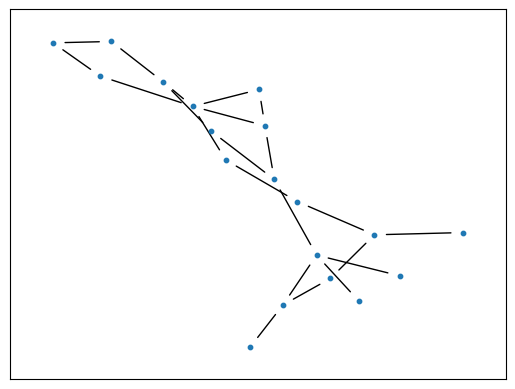

<Figure size 2000x1000 with 0 Axes>

[('STEO.PAPR_OPEC.M', 'STEO.COPS_OPEC.M'),
 ('STEO.PAPR_OPEC.M', 'CAPUTLG211S'),
 ('STEO.PAPR_OPEC.M', 'STEO.PATC_OECD.M'),
 ('STEO.COPS_OPEC.M', 'INDPRO'),
 ('STEO.COPS_OPEC.M', 'IPN213111N'),
 ('STEO.PATC_NON_OECD.M', 'PCU211211'),
 ('STEO.PATC_NON_OECD.M', 'STEO.CORIPUS.M'),
 ('STEO.PATC_NON_OECD.M', 'CPIENGSL'),
 ('STEO.PATC_NON_OECD.M', 'INDPRO'),
 ('PCU211211', 'forecast'),
 ('CPIENGSL', 'IPN213111N'),
 ('INDPRO', 'STEO.CORIPUS.M'),
 ('STEO.COPRPUS.M', 'IPG211111CN'),
 ('STEO.COPRPUS.M', 'STEO.PAPR_NONOPEC.M'),
 ('STEO.COPRPUS.M', 'IPG211S'),
 ('IPG211111CN', 'PET.MCRIMXX2.M'),
 ('IPG211S', 'CAPG211S'),
 ('PET.MCRIMXX2.M', 'STEO.PAPR_OPEC.M'),
 ('PET.MCRIMXX2.M', 'STEO.COPC_OPEC.M'),
 ('CAPG211S', 'STEO.PATC_NON_OECD.M'),
 ('forecast', 'WTISPLC'),
 ('WTISPLC', 'CPIENGSL')]

In [52]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore, BayesianEstimator
from pgmpy.models import BayesianModel


# Discretize the continuous variables using pandas cut function
num_bins = 3  # Adjust the number of bins as needed
train_data_discretized = pd.DataFrame()
for column in train_data.columns:
    if pd.api.types.is_numeric_dtype(train_data[column].dtype):  # Check if the column is numeric (int or float)
        train_data_discretized[column] = pd.cut(train_data[column], bins=num_bins, labels=False)
        train_data_discretized[column] = train_data_discretized[column].astype('category')
    else:
        train_data_discretized[column] = train_data[column]


# Initialize Hill Climbing Estimator with BicScore
state_names=dict(map(lambda e: (e, [0, 1, 2]), data.columns))
# print(state_names)

# Initialize Hill Climbing Estimator with BicScore
est = HillClimbSearch(train_data_discretized)
best_model = est.estimate(scoring_method=BicScore(train_data_discretized))
# est = HillClimbSearch(train_data)
# best_model = est.estimate(scoring_method=BicScore(train_data,state_names=state_names))
# Extract variable names from the best_model edges
variable_names = list(set(edge[0] for edge in best_model.edges()) | set(edge[1] for edge in best_model.edges()))
# Ensure that all variables in the data are included
missing_variables = set(data.columns) - set(variable_names)
# if missing_variables:
#     raise ValueError(f"Missing variables in BayesianModel: {missing_variables}")



# Fit the model to the training data
model = BayesianModel(best_model.edges())
# Add missing variables to the model
model.add_nodes_from(missing_variables)
# states=dict(map(lambda e: (e, [0, 1, 2]), data.columns))
# print(states)
model.fit(
    train_data_discretized,
    state_names=dict(map(lambda e: (e, [0, 1, 2]), data.columns)),
    estimator=BayesianEstimator,
    prior_type="K2"
)
# Print results
print("Nodes in the best model:", sorted(best_model.nodes()))
print("Edges in the best model:", list(best_model.edges()))

# Visualization using networkx and matplotlib
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.figure(figsize=(20, 10))
plt.show()

# Display the nodes and edges of the best model
sorted(model.nodes())
list(model.edges())


## Validation of the model

In [43]:
# Assuming the model is already trained using the training set
# ...

# Predict probabilities on the validation set
val_data_discretized = pd.DataFrame()
for column in vald_data.columns:
    if pd.api.types.is_numeric_dtype(vald_data[column].dtype):
        val_data_discretized[column] = pd.cut(vald_data[column], bins=num_bins, labels=False)
        val_data_discretized[column] = val_data_discretized[column].astype('category')
    else:
        val_data_discretized[column] = vald_data[column]





**Log-likelihood score**

In [36]:
from pgmpy.metrics import log_likelihood_score

In [46]:
log_likelihood_score(model, val_data_discretized)

-693.012505347816

**Structure score**

In [47]:
from pgmpy.metrics import structure_score
structure_score(model, val_data_discretized)

-565.343883684453

**Accuracy**

Let's now compare the accurance by looking at the predicted values and actual values

In [69]:
# Predict probabilities on the validation set
predicted_data = model.predict(val_data_discretized.drop(columns='forecast'))
# Actual values
validation_data_fore=val_data_discretized['forecast']

  0%|          | 0/22 [00:00<?, ?it/s]

In [71]:
list(predicted_data['forecast'])

[1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0]

In [72]:
list(validation_data_fore)

[1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0]

In [70]:
from sklearn.metrics import accuracy_score

# Assuming val_data_fore and predicted_data are Series
accuracy = accuracy_score(val_data_fore, predicted_data)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5454545454545454


Therefore the general accuracy is 54% which is greater than the accuracy in the Alvi's paper.